In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [78]:
size = '120M'
BASE_PATH = '/home/aiops/zhuty/tinyllama/scripts/evaluation/'
df = pd.read_csv(os.path.join(BASE_PATH, f"tiny_LLaMA_{size}_8k_results.csv"))

In [79]:
df.tail()

,Unnamed: 0,results,group_subtasks,configs,versions,n-shot,config,git_hash,pretty_env_info,transformers_version,upper_git_hash,eval_loss_arxiv,eval_loss_book,eval_loss_cc,eval_loss_rpwiki_en,name,ds
10,10,"{'lambada_openai': {'perplexity,none': 287.615...","{'hellaswag': [], 'lambada_openai': []}","{'hellaswag': {'task': 'hellaswag', 'group': [...","{'hellaswag': 1.0, 'lambada_openai': 1.0}","{'hellaswag': 10, 'lambada_openai': 10}","{'model': 'hf', 'model_args': 'pretrained=/hom...",NaN,PyTorch version: 2.1.0+cu121\nIs debug build: ...,4.34.0,NaN,2.853619,3.039836,2.749562,2.864591,120M_cc_merged_v2_8k_iter-080000-ckpt-step-20000,cc_merged_v2_8k
11,11,"{'lambada_openai': {'perplexity,none': 169.727...","{'hellaswag': [], 'lambada_openai': []}","{'hellaswag': {'task': 'hellaswag', 'group': [...","{'hellaswag': 1.0, 'lambada_openai': 1.0}","{'hellaswag': 10, 'lambada_openai': 10}","{'model': 'hf', 'model_args': 'pretrained=/hom...",NaN,PyTorch version: 2.1.0+cu121\nIs debug build: ...,4.34.0,NaN,2.693575,2.936590,2.665727,2.768544,120M_cc_merged_v2_8k_iter-160000-ckpt-step-40000,cc_merged_v2_8k
12,12,"{'lambada_openai': {'perplexity,none': 136.309...","{'hellaswag': [], 'lambada_openai': []}","{'hellaswag': {'task': 'hellaswag', 'group': [...","{'hellaswag': 1.0, 'lambada_openai': 1.0}","{'hellaswag': 10, 'lambada_openai': 10}","{'model': 'hf', 'model_args': 'pretrained=/hom...",NaN,PyTorch version: 2.1.0+cu121\nIs debug build: ...,4.34.0,NaN,2.609275,2.898234,2.618269,2.731354,120M_cc_merged_v2_8k_iter-240000-ckpt-step-60000,cc_merged_v2_8k
13,13,"{'lambada_openai': {'perplexity,none': 113.598...","{'hellaswag': [], 'lambada_openai': []}","{'hellaswag': {'task': 'hellaswag', 'group': [...","{'hellaswag': 1.0, 'lambada_openai': 1.0}","{'hellaswag': 10, 'lambada_openai': 10}","{'model': 'hf', 'model_args': 'pretrained=/hom...",NaN,PyTorch version: 2.1.0+cu121\nIs debug build: ...,4.34.0,NaN,2.549611,2.860320,2.584395,2.695454,120M_cc_merged_v2_8k_iter-320000-ckpt-step-80000,cc_merged_v2_8k
14,14,"{'lambada_openai': {'perplexity,none': 107.276...","{'hellaswag': [], 'lambada_openai': []}","{'hellaswag': {'task': 'hellaswag', 'group': [...","{'hellaswag': 1.0, 'lambada_openai': 1.0}","{'hellaswag': 10, 'lambada_openai': 10}","{'model': 'hf', 'model_args': 'pretrained=/hom...",NaN,PyTorch version: 2.1.0+cu121\nIs debug build: ...,4.34.0,NaN,2.529166,2.846335,2.568105,2.675709,120M_cc_merged_v2_8k_iter-400000-ckpt-step-100000,cc_merged_v2_8k


In [5]:
def get_step(x):
    return int(x.split('-')[-1])


In [81]:
df['iteration'] = df['name'].apply(lambda x: (x.split('_')[-1]))
df['step'] = df['iteration'].apply(get_step)

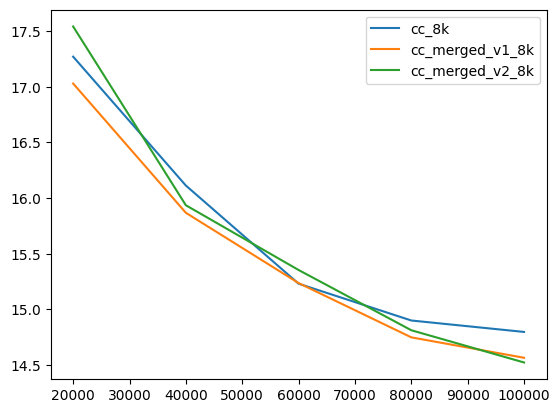

In [82]:
# Plot a line chart by each ds, with x-axis as iteration, y-axis as eval loss
eval_ds = 'rpwiki_en'
for ds in df['ds'].unique():
    df_ds = df[df['ds'] == ds]
    plt.plot(df_ds['step'], np.exp(df_ds[f'eval_loss_{eval_ds}']), label=ds)
plt.legend()

In [83]:
# get only the rows for the last step for each ds
df_last_step = df[df['step'] == min(40000, df['step'].max())]
result_ds = df_last_step[['ds', 'eval_loss_arxiv', 'eval_loss_book', 'eval_loss_cc', 'eval_loss_rpwiki_en']]
for eval_ds in ['arxiv','book', 'cc', 'rpwiki_en']:
    result_ds[f'{eval_ds}'] = np.exp(result_ds[f'eval_loss_{eval_ds}'])
result_ds = result_ds.drop(columns=['eval_loss_arxiv', 'eval_loss_book', 'eval_loss_cc', 'eval_loss_rpwiki_en'])
# get average for the 4 datasets
result_ds['avg'] = result_ds[['arxiv', 'book', 'cc', 'rpwiki_en']].mean(axis=1)
result_ds

/tmp/ipykernel_95/2482329365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_ds[f'{eval_ds}'] = np.exp(result_ds[f'eval_loss_{eval_ds}'])
/tmp/ipykernel_95/2482329365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_ds[f'{eval_ds}'] = np.exp(result_ds[f'eval_loss_{eval_ds}'])
/tmp/ipykernel_95/2482329365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,ds,arxiv,book,cc,rpwiki_en,avg
1,cc_8k,14.466256,19.569777,14.368439,16.112450,16.129230
6,cc_merged_v1_8k,14.737382,19.353088,14.325883,15.867578,16.070983
11,cc_merged_v2_8k,14.784431,18.851452,14.378401,15.935418,15.987426


In [6]:
size = '1b'
BASE_PATH = '/home/aiops/zhuty/tinyllama/scripts/evaluation/'
df = pd.read_csv(os.path.join(BASE_PATH, f"tiny_LLaMA_{size}_8k_results.csv"))
# Plot the hellaswag accuracy
df['iteration'] = df['name'].apply(lambda x: (x.split('_')[-1]))
df['step'] = df['iteration'].apply(get_step)
df['results'] = df['results'].apply(eval)

In [7]:
def extract_hella_acc(x):
    return x['hellaswag']['acc,none']

def extract_hella_stderr(x):
    return x['hellaswag']['acc_stderr,none']

def extract_lambada_acc(x):
    return x['lambada_openai']['acc,none']

def extract_lambada_stderr(x):
    return x['lambada_openai']['acc_stderr,none']

df['hella_acc'] = df['results'].apply(extract_hella_acc)
df['hella_std_err'] = df['results'].apply(extract_hella_stderr)
df['lambada_acc'] = df['results'].apply(extract_lambada_acc)
df['lambada_std_err'] = df['results'].apply(extract_lambada_stderr)

In [8]:
df_last_step = df[df['step'] == min(40000, df['step'].max())]
df_last_step = df[df['step'] ==  df['step'].max()]


In [9]:
df_last_step[['ds', 'hella_acc', 'hella_std_err', 'lambada_acc', 'lambada_std_err']]

,ds,hella_acc,hella_std_err,lambada_acc,lambada_std_err
3,cc_8k,0.333798,0.004706,0.326994,0.006536
7,cc_merged_v1_8k,0.337682,0.004720,0.351252,0.006651
11,cc_merged_v2_8k,0.332902,0.004703,0.352610,0.006656


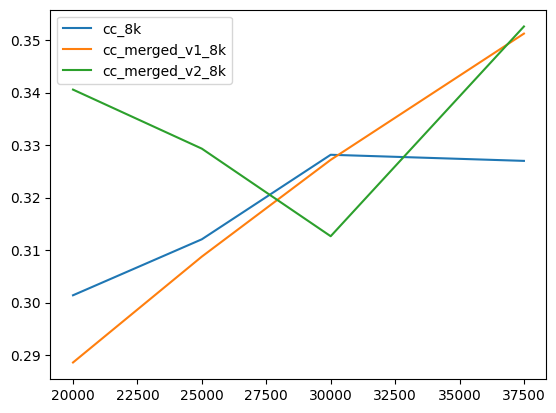

In [10]:
# Plot the lambada accuracy across different steps
# each line should be a ds
for ds in df['ds'].unique():
    df_ds = df[df['ds'] == ds]
    plt.plot(df_ds['step'], df_ds['lambada_acc'], label=ds)
plt.legend()